<a href="https://colab.research.google.com/github/Deleolowo/Assignment/blob/main/Project_4_Unsupervised_Image_Clustering_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💻 Project 4: Unsupervised Image Clustering and Visualization (MNIST)

In [1]:
### 1. Setup and Library Imports
# Run this cell first to import all necessary libraries.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, homogeneity_score

# Set plot style
sns.set_style("whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


Total samples: 1797
Total features (pixels): 64
True number of classes (digits): 10


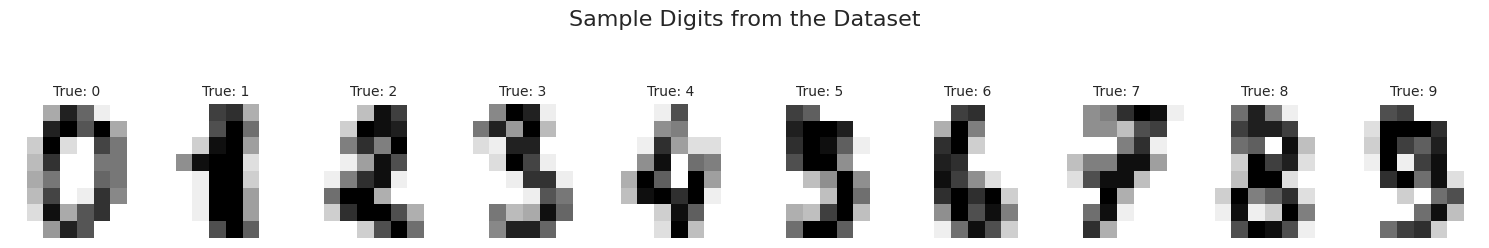

In [2]:
### 2. Data Preparation and Exploration
# Load the MNIST-like digits dataset from scikit-learn.

# Load the digits dataset (a smaller, 8x8 version of MNIST)
# For the full 28x28 MNIST, use fetch_openml('mnist_784', version=1)
# We will use load_digits() for faster execution and visualization in Colab.
data, target = load_digits(return_X_y=True)
n_samples, n_features = data.shape
n_classes = len(np.unique(target))

print(f"Total samples: {n_samples}")
print(f"Total features (pixels): {n_features}") # 64 features (8x8 images)
print(f"True number of classes (digits): {n_classes}")

# --- Preprocessing ---

# 1. Normalization is often implicitly handled by clustering algorithms
#    but standard scaling (mean=0, variance=1) is generally better for PCA/KMeans.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 2. Flattening is already done by load_digits() (64 features)

# --- EDA: Visualize Sample Images ---
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
fig.suptitle('Sample Digits from the Dataset', fontsize=16)

for i in range(10):
    ax = axes[i]
    # Reshape the 64-feature vector back to an 8x8 image
    ax.imshow(data[i].reshape(8, 8), cmap='binary')
    ax.set_title(f'True: {target[i]}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

**Data Preparation and ExplorationLoading and Preprocessing**: The primary goal here is to transform the raw image data into a format suitable for machine learning algorithms.Load Data: Use sklearn.datasets.load_digits() or sklearn.datasets.fetch_openml('mnist_784') to load the MNIST dataset directly within the notebook.Flattening: Each image (e.g., $28 \times 28$ pixels) must be flattened into a single vector of pixel values ($784$ features). The data matrix $X$ will have a shape of $(N, 784)$, where $N$ is the number of images.Normalization: Pixel values typically range from 0 to 255. Normalize the data by dividing by $255.0$ to scale all values to the range $[0, 1]$. This helps ensure that all features contribute equally to the distance calculations in K-Means.$$X_{\text{norm}} = \frac{X_{\text{raw}}}{255.0}$$Exploratory Data Analysis (EDA)Check Data Shape: Verify the dimensions of the dataset (number of samples and features).Visualize Sample Images: Display a few random images to confirm the data is loaded correctly.Examine Label Distribution (Optional but Recommended): Even though this is an unsupervised project, looking at the known digit labels (0-9) helps confirm that the inherent groupings you are trying to find are indeed the 10 digits.

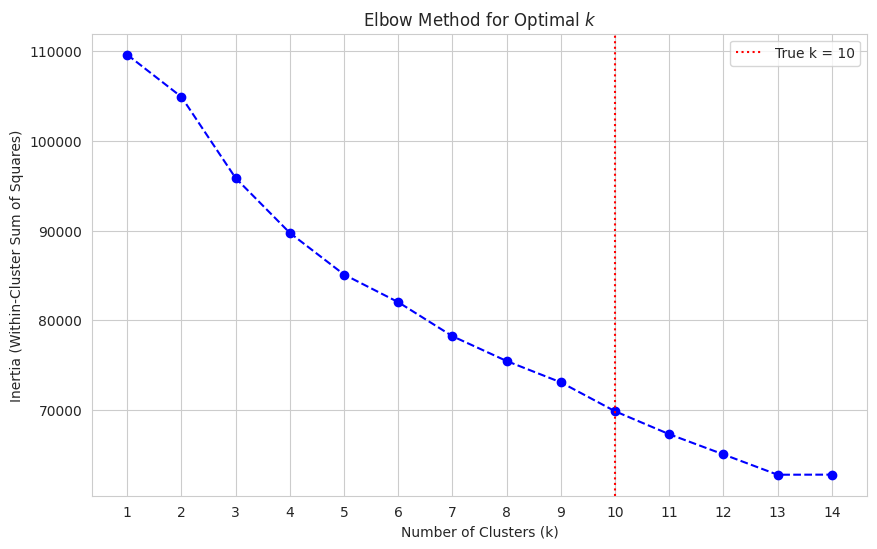


Optimal K chosen (based on true classes): 10


In [3]:
### 3. Clustering: Determining Optimal K with the Elbow Method

# We will test K from 1 up to the true number of classes + 5
k_range = range(1, n_classes + 5)
inertia = []

# This loop measures WCSS (Inertia) for different k values
for k in k_range:
    # Set a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# --- Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal $k$')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
# Highlight the known true number of classes (k=10)
plt.axvline(x=n_classes, color='r', linestyle=':', label=f'True k = {n_classes}')
plt.legend()
plt.show()

# --- Select Optimal K ---
# Based on the MNIST context and the plot, we choose k=10.
optimal_k = n_classes
print(f"\nOptimal K chosen (based on true classes): {optimal_k}")

** Clustering with K-MeansApplying K-MeansAlgorithm:** Use sklearn.cluster.KMeans to apply the algorithm to the normalized, flattened data $X_{\text{norm}}$.Distance Metric: K-Means minimizes the within-cluster sum of squares (WCSS), often called inertia.$$\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$where $k$ is the number of clusters, $C_i$ is cluster $i$, $x$ is a data point, and $\mu_i$ is the centroid of cluster $i$.Determining Optimal Number of Clusters ($k$)Elbow Method:Run K-Means for a range of $k$ values (e.g., $k=1$ to $15$).Record the Inertia (WCSS) for each $k$.Plot Inertia vs. $k$.The optimal $k$ is typically found at the "elbow" point, where the decrease in WCSS begins to level off significantly. Since MNIST has 10 true classes (digits 0-9), you should likely choose $k=10$ or the elbow point nearest to it.Interpreting Cluster CentroidsAfter training the K-Means model with the chosen $k$:Centroids: The cluster_centers_ attribute contains the coordinates of the cluster centroids. These are vectors of $784$ values.Visualization: Reshape each $784$-dimensional centroid back into a $28 \times 28$ image. Displaying these centroid images will reveal the characteristic "average digit" that each cluster represents, thus providing an interpretation of the unsupervised groupings.


K-Means training time: 0.03 seconds.
Homogeneity Score (Clustering Purity): 0.639


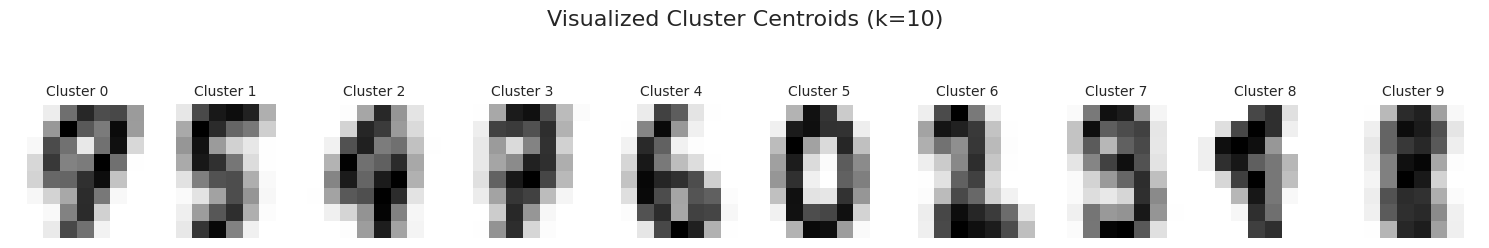

In [4]:
### 4. Training K-Means and Analyzing Centroids

# Train K-Means with the chosen optimal_k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
t0 = time()
kmeans_model.fit(X_scaled)
t_kmeans = time() - t0
cluster_labels = kmeans_model.labels_

print(f"\nK-Means training time: {t_kmeans:.2f} seconds.")
print(f"Homogeneity Score (Clustering Purity): {homogeneity_score(target, cluster_labels):.3f}")

# --- Visualize Cluster Centroids ---
centroids = kmeans_model.cluster_centers_

fig, axes = plt.subplots(1, optimal_k, figsize=(15, 3))
fig.suptitle(f'Visualized Cluster Centroids (k={optimal_k})', fontsize=16)

# Scale the centroids back for better visualization (undo the StandardScaler)
# Note: This is an approximation; a more rigorous way involves the scaler's mean/std
centroids_scaled = scaler.inverse_transform(centroids)

for i in range(optimal_k):
    ax = axes[i]
    # Reshape the centroid vector back to an 8x8 image
    ax.imshow(centroids_scaled[i].reshape(8, 8), cmap='binary')
    ax.set_title(f'Cluster {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

**Model Evaluation and PredictionCluster Assignment and PredictionAssignment:** Once the K-Means model is trained, it can assign a cluster label to any data point using the minimum distance criterion.Demonstration:Split your dataset into a training set and a separate test set (e.g., $80/20$ split).Train K-Means on the training set.Use the trained model's predict() method on the test set to assign cluster labels to new, unseen images.Validation and AnalysisHomogeneity/Purity: Since we know the true labels (0-9) in the MNIST dataset, you can evaluate how well the clusters correspond to the true labels. You can create a contingency matrix (or a cross-tabulation) that maps the cluster IDs (0 to $k-1$) to the true digit labels (0-9).Metrics (Optional): Calculate Homogeneity Score and Completeness Score using sklearn.metrics.Homogeneity: A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.1Completeness: A clustering result satisfies completeness if all the data points that are members of a given class are in the same cluster.2


--- Running PCA for 2D Visualization ---
PCA reduction time: 0.09 seconds.


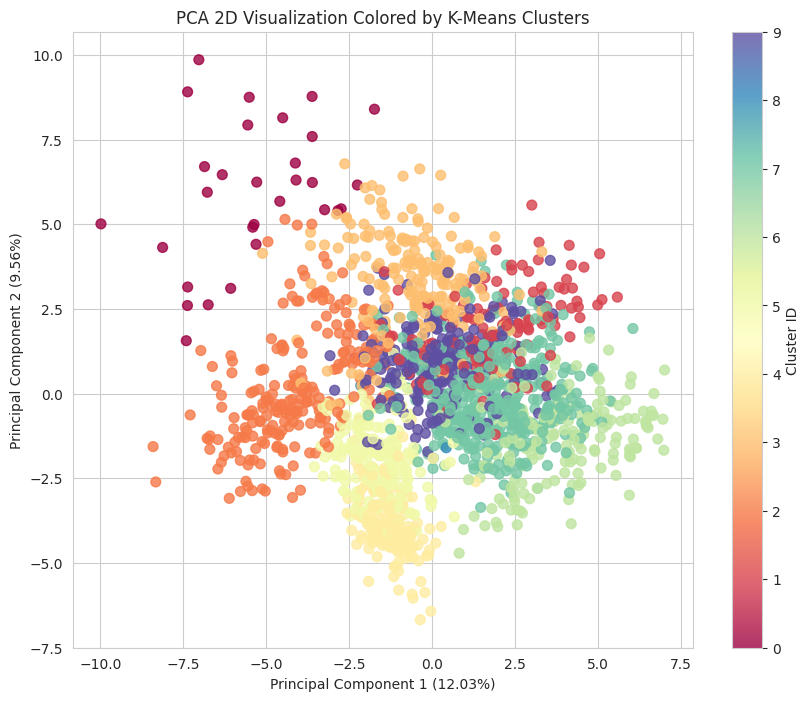


--- Running t-SNE for 2D Visualization ---
t-SNE reduction time: 29.60 seconds. (Note: This is slower than PCA)


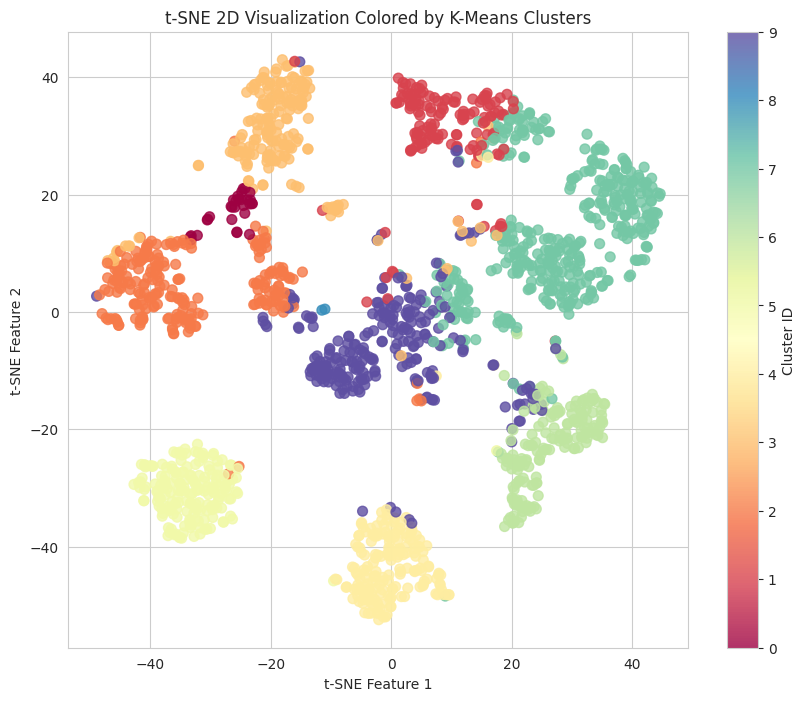

In [5]:
### 5. Dimensionality Reduction and Visualization

# --- PCA (Principal Component Analysis) ---
print("\n--- Running PCA for 2D Visualization ---")
pca = PCA(n_components=2, random_state=42)
t0 = time()
X_pca = pca.fit_transform(X_scaled)
t_pca = time() - t0
print(f"PCA reduction time: {t_pca:.2f} seconds.")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=cluster_labels,
                      cmap='Spectral',
                      alpha=0.8,
                      s=50) # Use K-Means labels for coloring
plt.title('PCA 2D Visualization Colored by K-Means Clusters')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

# --- t-SNE (t-Distributed Stochastic Neighbor Embedding) ---
print("\n--- Running t-SNE for 2D Visualization ---")

# t-SNE is computationally intensive; setting parameters is key.
# We'll use a perplexity often recommended for this size of data.
tsne = TSNE(n_components=2,
            init='pca',
            random_state=42,
            perplexity=30)
t0 = time()
X_tsne = tsne.fit_transform(X_scaled)
t_tsne = time() - t0
print(f"t-SNE reduction time: {t_tsne:.2f} seconds. (Note: This is slower than PCA)")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                      c=cluster_labels,
                      cmap='Spectral',
                      alpha=0.8,
                      s=50) # Use K-Means labels for coloring
plt.title('t-SNE 2D Visualization Colored by K-Means Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

**Dimensionality Reduction and Visualizat3ion:** This step is crucial for visually assessing the quality of the clustering.Principal Component Analysis (PCA)Purpose: PCA linearly projects the $784$-dimensional data onto a lower-dimensional subspace while preserving the maximum variance.Implementation: Use sklearn.decomposition.PCA to reduce the dimensions from $784$ to 2 components.Visualization: Create a scatter plot of the data points based on the 2 PCA components. Color the points according to their K-Means cluster ID.t-Distributed Stochastic Neighbor Embedding (t-SNE)Purpose: t-SNE is a non-linear technique excellent for visualizing high-dimensional data by attempting to preserve the local structure (closeness of neighbors) in the 2D map. It is often much better than PCA for visualization.Implementation: Use sklearn.manifold.TSNE to reduce the dimensions from $784$ to 2 components. Note that t-SNE is computationally expensive and is often run on the output of PCA (e.g., PCA to 50 dimensions, then t-SNE to 2) for large datasets.Visualization: Create a scatter plot of the data points based on the 2 t-SNE components. Color the points according to their K-Means cluster ID. This plot is the final visual evidence of your clustering effectiveness.